<a href="https://colab.research.google.com/github/Avinash1734/ML-Ops/blob/main/Paddy3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, AveragePooling2D, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.regularizers import l1
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import EfficientNetB4
import os
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

train_df = pd.read_csv(r"/content/drive/MyDrive/paddy-disease-classification/train.csv")
train_df.head()


,image_id,label,variety,age
0,100330.jpg,bacterial_leaf_blight,ADT45,45
1,100365.jpg,bacterial_leaf_blight,ADT45,45
2,100382.jpg,bacterial_leaf_blight,ADT45,45
3,100632.jpg,bacterial_leaf_blight,ADT45,45
4,101918.jpg,bacterial_leaf_blight,ADT45,45


In [ ]:
train_df['label'].value_counts()

label
normal                      1764
blast                       1738
hispa                       1594
dead_heart                  1442
tungro                      1088
brown_spot                   965
downy_mildew                 620
bacterial_leaf_blight        479
bacterial_leaf_streak        380
bacterial_panicle_blight     337
Name: count, dtype: int64

In [5]:
# Check the number of unique values
train_df['label'].nunique()


10

In [6]:
rescale = tf.keras.layers.Rescaling(1./255)

In [7]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/paddy-disease-classification/train_images",
    batch_size = 32,
    image_size = (224, 224),
    validation_split=0.2,
    subset="training",
    seed=123
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory=r"/content/drive/MyDrive/paddy-disease-classification/train_images",
    batch_size=32,
    image_size=(224, 224),
    validation_split=0.2,
    subset="validation",
    seed=123
)

test_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/paddy-disease-classification/test_images",
    batch_size = 32,
    image_size = (224, 224),
    label_mode = None,
    shuffle=False

)

Found 10407 files belonging to 10 classes.
Using 8326 files for training.
Found 10407 files belonging to 10 classes.
Using 2081 files for validation.
Found 3469 files belonging to 1 classes.


In [8]:
fig = px.scatter(train_df, x="age", y= "variety",color = "label")
fig.show()


In [9]:
def visualize_images(path, num_images=5):


    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")


    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))


    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    for i, image_filename in enumerate(selected_images):

        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)
        image


        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)


    plt.tight_layout()
    plt.show()


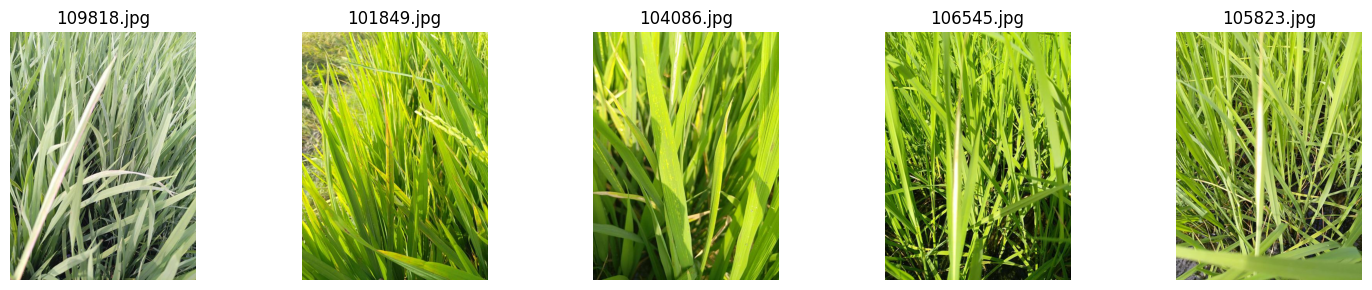

In [10]:

path_to_visualize = r"/content/drive/MyDrive/paddy-disease-classification/train_images/bacterial_leaf_blight"


visualize_images(path_to_visualize, num_images=5)

In [11]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = validation_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [12]:

efficientnet_base = EfficientNetB4(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


efficientnet_base.trainable = False

71686520/71686520 [==============================] - 0s 0us/step


In [13]:
from keras.models import Sequential
# Build the model
model = Sequential()


model.add(efficientnet_base)


model.add(AveragePooling2D())


model.add(Flatten())


model.add(Dense(220, activation='relu'))


model.add(Dropout(0.25))


model.add(Dense(10, activation='softmax'))
3

3

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 7, 7, 1792)        17673823  
 )                                                               
                                                                 
 average_pooling2d (Average  (None, 3, 3, 1792)        0         
 Pooling2D)                                                      
                                                                 
 flatten (Flatten)           (None, 16128)             0         
                                                                 
 dense (Dense)               (None, 220)               3548380   
                                                                 
 dropout (Dropout)           (None, 220)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2

In [15]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
 loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
%%time

early_stopping = EarlyStopping(patience=10)

history= model.fit(train_ds,
          validation_data=val_ds,
          epochs=10,
          callbacks=[early_stopping])


Epoch 1/10
261/261 [==============================] - 2781s 10s/step - loss: 1.2620 - accuracy: 0.5790 - val_loss: 0.7955 - val_accuracy: 0.7626
Epoch 2/10
261/261 [==============================] - 49s 186ms/step - loss: 0.7329 - accuracy: 0.7652 - val_loss: 0.5887 - val_accuracy: 0.8232
Epoch 3/10
261/261 [==============================] - 49s 186ms/step - loss: 0.5512 - accuracy: 0.8319 - val_loss: 0.4698 - val_accuracy: 0.8578
Epoch 4/10
261/261 [==============================] - 48s 185ms/step - loss: 0.4414 - accuracy: 0.8663 - val_loss: 0.4207 - val_accuracy: 0.8693
Epoch 5/10
261/261 [==============================] - 49s 190ms/step - loss: 0.3618 - accuracy: 0.8957 - val_loss: 0.3822 - val_accuracy: 0.8808
Epoch 6/10
261/261 [==============================] - 48s 184ms/step - loss: 0.3098 - accuracy: 0.9136 - val_loss: 0.3373 - val_accuracy: 0.9005
Epoch 7/10
261/261 [==============================] - 48s 185ms/step - loss: 0.2666 - accuracy: 0.9231 - val_loss: 0.3172 - val_ac

In [17]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

66/66 [==============================] - 12s 164ms/step - loss: 0.2860 - accuracy: 0.9183
Validation Loss: 0.28601330518722534
Validation Accuracy: 0.9183084964752197


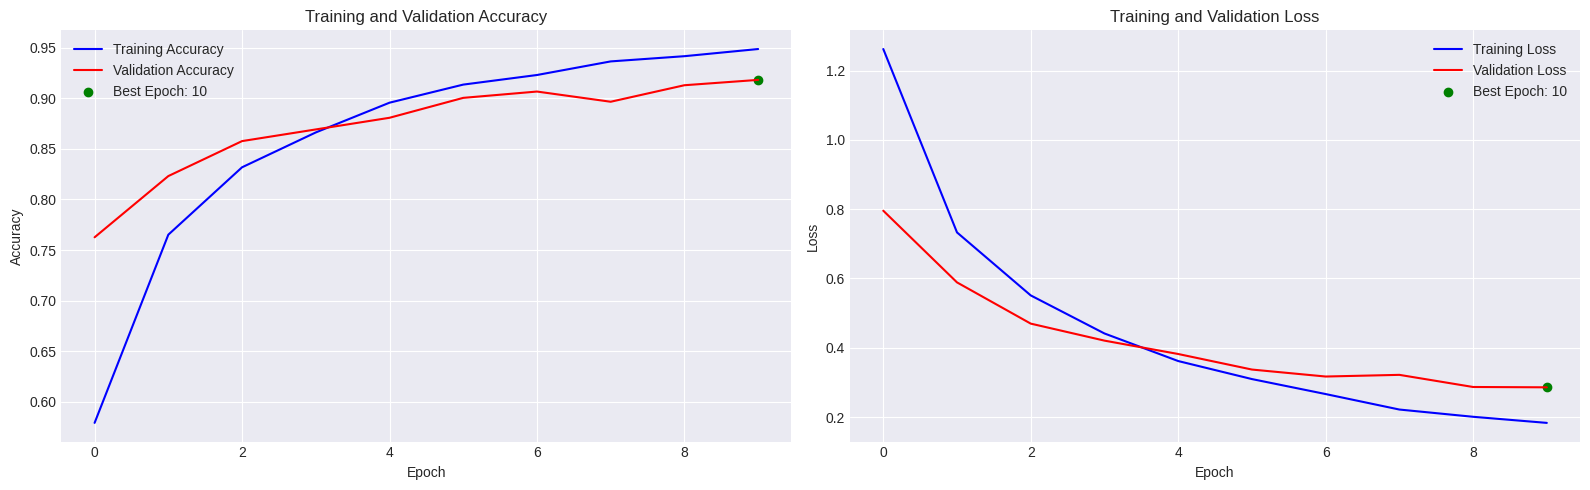

AttributeError: module 'matplotlib.pyplot' has no attribute 'history'

In [19]:

best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1


plt.style.use('seaborn-darkgrid')

fig, axs = plt.subplots(1, 2, figsize=(16, 5))


axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')

axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()
plt.history()



In [20]:
  # Save the entire model to a HDF5 file
model.save('my_trained_model.h5')

In [21]:
from google.colab import files

# Download the saved model file
files.download('my_trained_model.h5')

# Download the saved model weights file
files.download('my_model_weights.h5')




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: my_model_weights.h5

Streamlit Part

In [2]:
!pip install streamlit
!pip install tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 9.0 MB/s eta 0:00:00


In [3]:
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model



# Function to make predictions
def predict(image_data):
    # Preprocess image_data if needed
    # Example: image_data = preprocess(image_data)

    # Make predictions using the loaded model
    predictions = model.predict(image_data)

    return predictions

# Streamlit app
def main():
    st.title('Model Deployment with Streamlit')

    # Example: Upload an image file
    uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "png"])

    if uploaded_file is not None:
        # Display the uploaded image
        image = tf.image.decode_image(uploaded_file.read(), channels=3)
        st.image(image, caption='Uploaded Image.', use_column_width=True)

        # Process the image and make predictions
        predictions = predict(image_data)  # Pass image data to the predict function
        st.write(predictions)  # Display predictions

if __name__ == '__main__':
    main()


2024-04-29 06:49:10.356 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


In [5]:
!streamlit run paddy2.0.py.py


  Stopping...
  Stopping...


Prediction Part

In [ ]:
from google.colab import drive
drive.mount('/content/drive')